In [148]:
#!pip install worldmap

#import worldmap as worldmap

import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

df_Data = pd.read_csv("EdStatsData.csv")
df_FootNote = pd.read_csv("EdStatsFootNote.csv")
df_Country = pd.read_csv("EdStatsCountry.csv")
df_Series = pd.read_csv("EdStatsSeries.csv")
df_CountrySeries = pd.read_csv("EdStatsCountry-Series.csv")

# FEW FONCTIONS DEFINED TO HELP DESCRIBING THE CHARACTERISTICS OF THE INPUT FILES

# Duplicates: Calculate the number of duplicates in dataframe "data" 

def Duplicates(data):
    return len(data)-len(data.drop_duplicates())

# Missing_cells: Calculate the number of empty cells in dataframe "data" 

def Missing_Cells(data):
        return data.isna().sum().sum()

# Missing_Cells_percent: Calculate the percentage of empty cells in dataframe "data" 

def Missing_Cells_percent(data):
        return Missing_Cells(data)/(data.size)*100
    
# Filled_Cells: Calculate the number of existing values in dataframe "data"

def Filled_Cells (data):
        return data.notna().sum()  
    
#Filled_Cells_percent: Calculate the percentage of existing values in dataframe "data"

def Filled_Cells_percent (data):
        return Filled_Cells(data)/(len(data.index))*100

    
# INITIALISE FILES_SPEC TO SERIES DICTIONARY

Files_Spec = {'Total rows' : pd.Series([len(df_Data), len(df_FootNote), len(df_Country), len(df_Series),
                                            len(df_CountrySeries)],
                       index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                               'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']),
      'Total columns' : pd.Series([len(df_Data.columns), len(df_FootNote.columns), len(df_Country.columns),
                                       len(df_Series.columns), len(df_CountrySeries.columns)],
                        index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                                'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']),
             'Total duplicates' : pd.Series([Duplicates(df_Data), Duplicates(df_FootNote), Duplicates(df_Country),
                                       Duplicates(df_Series), Duplicates(df_CountrySeries)],
                        index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                                'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']),
             'Total Missing cells ' : pd.Series([Missing_Cells(df_Data), Missing_Cells(df_FootNote), Missing_Cells(df_Country),
                                       Missing_Cells(df_Series), Missing_Cells(df_CountrySeries)],
                        index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                                'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']),
             'Missing cells (%)' : pd.Series([Missing_Cells_percent(df_Data), Missing_Cells_percent(df_FootNote), 
                                                        Missing_Cells_percent(df_Country), Missing_Cells_percent(df_Series),
                                                        Missing_Cells_percent(df_CountrySeries)],
                        index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                                'EdStatsSeries.csv', 'EdStatsCountry-Series.csv'])}

# Creates Dataframe df_Files_Spec

df_Files_Spec = pd.DataFrame(Files_Spec)
index = df_Files_Spec.index
index. name = "Input File Name"
round(df_Files_Spec, 2)


# CHARACTERISTICS OF THE DIFFERENT INPUT FILES

,Total rows,Total columns,Total duplicates,Total Missing cells,Missing cells (%)
Input File Name,,,,,
EdStatsData.csv,886930,70,0,53455179,86.10
EdStatsFootNote.csv,643638,5,0,643638,20.00
EdStatsCountry.csv,241,32,0,2354,30.52
EdStatsSeries.csv,3665,21,0,55203,71.72
EdStatsCountry-Series.csv,613,4,0,613,25.00


In [149]:
# OVERVIEW OF THE DIFFERENT INPUT FILES

from IPython.display import display

display(df_Data.head(2))

# Data numbers for all indicators/region/country

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
display(df_FootNote.head(2))

# Description of where the data come from

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [151]:
display(df_Country.head(2))

# Countries economical description

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [152]:
display(df_Series.head(2))

# Details description of indicators

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
display(df_CountrySeries.head(2))

# Country codes and data sources

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [154]:
# DETAILED INSPECTION OF THE LAST COLUMN "Unnamed" IN EACH FILE

Unnamed_Files = {'Existing Data' : pd.Series([Filled_Cells(df_Data['Unnamed: 69']), Filled_Cells(df_FootNote['Unnamed: 4']),
                                              Filled_Cells(df_Country['Unnamed: 31']), Filled_Cells(df_Series['Unnamed: 20']),
                                            Filled_Cells(df_CountrySeries['Unnamed: 3'])],
                       index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                               'EdStatsSeries.csv', 'EdStatsCountry-Series.csv']),
                 
                 'Column Name' : pd.Series(['Unnamed: 69', 'Unnamed: 4', 'Unnamed: 31', 'Unnamed: 20', 'Unnamed: 3'],
                       index =['EdStatsData.csv', 'EdStatsFootNote.csv', 'EdStatsCountry.csv',
                               'EdStatsSeries.csv', 'EdStatsCountry-Series.csv'])}
                 
df_Unnamed_Files = pd.DataFrame(Unnamed_Files)
index = df_Unnamed_Files.index
index. name = "Input File Name"
df_Unnamed_Files


,Existing Data,Column Name
Input File Name,,
EdStatsData.csv,0,Unnamed: 69
EdStatsFootNote.csv,0,Unnamed: 4
EdStatsCountry.csv,0,Unnamed: 31
EdStatsSeries.csv,0,Unnamed: 20
EdStatsCountry-Series.csv,0,Unnamed: 3


In [79]:
# LAST COLUMN "Unnamed" DELECTED IN EACH FILE (NO DATA)

df_Data = df_Data.drop(['Unnamed: 69'], axis=1)
df_FootNote = df_FootNote.drop(['Unnamed: 4'], axis=1)
df_Country = df_Country.drop(['Unnamed: 31'], axis=1)
df_Series = df_Series.drop(['Unnamed: 20'], axis=1)
df_CountrySeries = df_CountrySeries.drop(['Unnamed: 3'], axis=1)


In [161]:
##round(Missing_Cells_percent (df_Data.loc[:, '1970':'2100']), 2)

91.18

In [162]:
# OVERVIEW OF THE LABEL "Country Name" & THEIR ASSOCIATED "Country Code" FROM DATAFRAME df_Data

cols = [col for col in df_Data.columns if col in ['Country Name', 'Country Code']]
df2 = df_Data[cols]
df2.drop_duplicates()

,Country Name,Country Code
0,Arab World,ARB
3665,East Asia & Pacific,EAS
7330,East Asia & Pacific (excluding high income),EAP
10995,Euro area,EMU
14660,Europe & Central Asia,ECS
...,...,...
868605,Virgin Islands (U.S.),VIR
872270,West Bank and Gaza,PSE
875935,"Yemen, Rep.",YEM
879600,Zambia,ZMB


In [164]:
## WORLD REGIONS SEPARATION FROM INDIVIDUAL COUNTRIES & NON-GEOGRAPHIC CATEGORIES from df_Data

## List of pertinent regions ("Country Code based")

List_GeoLoc = ['EUU', 'NAC', 'SAS', 'LCN', 'ARB', 'SSF', 'MEA', 'EAS', 'ECS']
df_GeoLoc = df_Data[df_Data['Country Code'].isin(List_GeoLoc)] 

## List of non-geographic regions ("Country Code" based)

List_NonCountry = (['EMU', 'HPC', 'HIC', 'LMY', 'LDC', 'LIC', 'LMC', 'MIC', 'OED', 'UMC', 'WLD', 'ECA', 'LAC', 'EAP', 'SSA', 'MNA'])
df_NonCountry = df_Data[df_Data['Country Code'].isin(List_NonCountry)]

## List of individual countries by substraction

List_CountryLeft = List_GeoLoc + List_NonCountry
df_Country = df_Data[~df_Data['Country Code'].isin(List_CountryLeft)]

##-----------------------------------------------------------------------------------------------------



In [137]:
## CHOICE BY EXCLUSION - 1st PHASE - INDICATORS SEMANTIC ANALYSIS - Gross exclusion
## We have 3665 unique indicators and want to go down to ~15 pertinent ones
## We eliminate all indicators that are not pertinent with the business and contain the following keywords

NonKeyWords=['EGRA', 'adult', 'elderly', 'Elderly', 'male', 'Male', 'inbound', 'outbound', 'literacy', 'Out', 'Adult', 'primary', 'Primary', 'Gini', 'ISCED ', 'Wittgenstein','PIRLS', 'official', 'Official', 'Mortality', 'Africa', 'Repeaters', 'repeaters', 'Repetition', 'Average', 'average', 'Score','lower secondary', 'HIV', 'childhood','PISA', 'MICS', 'TIMSS', 'DHS', 'SACMEQ', 'PASEC', 'LLECE', 'SABER', 'salaries', 'Gender', 'compulsory','gender']
df_GeoLoc_NonKeyWords = df_GeoLoc[~df_GeoLoc['Indicator Name'].str.contains('|'.join(NonKeyWords))]

#------------------------------------------------------------------------------
##round(Filled_Cells_percent (df_GeoLoc_NonKeyWords.loc[:, '1970':'1999']), 2)

# This exclusion makes the number of indicators drop from 3665 down to 324

In [86]:
df_GeoLoc_NonKeyWords.to_csv("Data_1st_pass.csv")

In [130]:
## INTERNET YEARS -  TIMEFRAME RESTRICTION YEARS+2000 TIL DATE OF STUDY 2016

df_SubGeoLoc = df_GeoLoc_NonKeyWords.drop(df_GeoLoc_NonKeyWords.loc[:, '2017':'2100'].columns, axis = 1)
df_SubGeoLoc1 = df_SubGeoLoc.drop(df_SubGeoLoc.loc[:, '1970':'1999'].columns, axis = 1)

# SubGeoLoc1: All data within 2000 to 2016

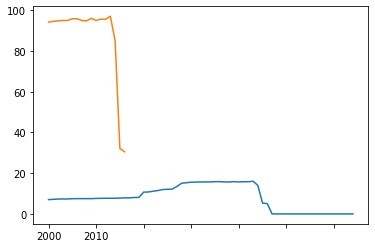

In [207]:
## CHOICE BY EXCLUSION - 2nd PHASE - AVAILABILITY OF INDICATORS - Gross exclusion
## We eliminate all indicators data that are not available at least 70% over the 2000-2016 period

Filter = 0.2
limitPer = len(df_SubGeoLoc1.columns) * Filter
df_SubGeoLoc2 = df_SubGeoLoc1.dropna(thresh=limitPer, axis=0)

# SubGeoLoc2: All data within 2000 to 2016 with a Filter 
# ---------------------------------------------------------------------------
##pd.set_option('display.max_rows', None)
##round(Filled_Cells_percent (df_SubGeoLoc2.loc[:, '2000':'2016']), 2)

#----------------------------------------------------------------------------
#fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
#df1.plot(..., ax=ax1)
#df2.plot(..., ax=ax2)
df1 = Filled_Cells_percent (df_GeoLoc_NonKeyWords.loc[:, '1970':'2100']).plot()
df2 = Filled_Cells_percent (df_SubGeoLoc2.loc[:, '2000':'2016']).plot()

##fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
##df1.plot(Filled_Cells_percent (df_GeoLoc_NonKeyWords.loc[:, '1970':'2100']), ax=ax1)
##df2.plot(Filled_Cells_percent (df_SubGeoLoc2.loc[:, '2000':'2016']), ax=ax2)

##plt.tight_layout()  # Optional ... often improves the layout 

## # This exclusion makes the number of indicators drop from 324 down to 50

In [139]:
df_SubGeoLoc2.to_csv("Data_2nd_pass.csv")

round(Filled_Cells_percent (df_SubGeoLoc2.loc[:, '2000':'2016']), 2)

2000     98.67
2001     99.11
2002     99.56
2003     99.78
2004     99.56
2005    100.00
2006    100.00
2007    100.00
2008    100.00
2009     99.56
2010     99.56
2011     99.11
2012     98.67
2013     99.33
2014     87.58
2015     33.70
2016     32.59
dtype: float64

In [108]:
## CHOICE BY INCLUSION - 3rd PHASE - Net inclusion
## Among the 50 remaining indicators, we chose ~15 that seem pertinent to our problematic

Indicators=['UIS.E.4', 'NY.GDP.MKTP.PP.CD', 'NY.GNP.MKTP.PP.CD', 'SP.POP.GROW', 'IT.NET.USER.P2', 'SL.UEM.TOTL.ZS',
            'SE.SEC.ENRL.TC.ZS', 'UIS.PTRHC.3', 'SE.SEC.NENR', 'SP.POP.TOTL', 'UIS.GTVP.3.GPV', 'UIS.GTVP.23.GPV', 
            'SE.SEC.ENRR', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP']
df_GeoLoc_Indicators = df_SubGeoLoc2[df_SubGeoLoc2['Indicator Code'].isin(Indicators)]
df_GeoLoc_Indicators.to_csv("Data_3rd_pass.csv")

In [105]:
df_GeoLoc_Indicators['Indicator Name'].drop_duplicates()


1171    Enrolment in post-secondary non-tertiary educa...
1249                   GDP, PPP (current international $)
1253                   GNI, PPP (current international $)
1335     Gross enrolment ratio, secondary, both sexes (%)
1339      Gross enrolment ratio, tertiary, both sexes (%)
1343    Gross enrolment ratio, upper secondary, both s...
1375                      Internet users (per 100 people)
1654        Net enrolment rate, secondary, both sexes (%)
2036    Percentage of students in secondary education ...
2055    Percentage of students in upper secondary educ...
2307                         Population growth (annual %)
2533                                    Population, total
2552    Pupil-teacher ratio in secondary education (he...
2554    Pupil-teacher ratio in upper secondary educati...
3348         Unemployment, total (% of total labor force)
Name: Indicator Name, dtype: object

In [118]:
round(Filled_Cells_percent (df_GeoLoc_Indicators.loc[:, '2000':'2016']), 2)

2000     99.26
2001     99.26
2002     99.26
2003    100.00
2004    100.00
2005    100.00
2006    100.00
2007    100.00
2008    100.00
2009    100.00
2010    100.00
2011    100.00
2012    100.00
2013    100.00
2014     89.63
2015     31.11
2016     31.11
dtype: float64